In [1]:
# PACKAGE: DO NOT EDIT
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
matplotlib.style.use('fivethirtyeight')
from sklearn.datasets import fetch_lfw_people, fetch_mldata, fetch_olivetti_faces
import time
import timeit

In [2]:
%matplotlib inline
from ipywidgets import interact

In [3]:
image_shape = (64, 64)
# Load faces data
dataset = fetch_olivetti_faces()
faces = dataset.data.T

print('Shape of the faces dataset: {}'.format(faces.shape))
print('{} data points'.format(faces.shape[1]))

Shape of the faces dataset: (4096, 400)
400 data points


In [4]:
def show_face(face):
    plt.figure()
    plt.imshow(face.reshape((64, 64)), cmap='gray')
    plt.show()

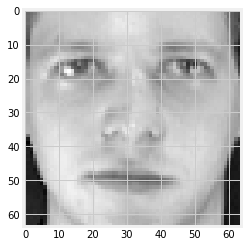

In [5]:
@interact(n=(0, faces.shape[1]-1))
def display_faces(n=0):
    plt.figure()
    plt.imshow(faces[:,n].reshape((64, 64)), cmap='gray')
    plt.show()

In [6]:
# GRADED FUNCTION: DO NOT EDIT
def mean_naive(X):
    "Compute the mean for a dataset X nby iterating over the data points"
    # X is of size (D,N) where D is the dimensionality and N the number of data points    
    D, N = X.shape
    el = []
    for n in range(N):
        el.append(X[::,n]) # for all the images, we add its representation(4096=64x64)to the list 
    mean = sum(el) / N     # sum(el) do the sum of all images pixel by pixel
    
    return mean

In [7]:
mean_naive(faces)

array([ 0.40013435,  0.43423545,  0.4762809 , ...,  0.32141536,
        0.31364691,  0.31045464], dtype=float32)

In [8]:
def cov_naive(X):
    """Compute the covariance for a dataset of size (D,N) 
    where D is the dimension and N is the number of data points"""
    
    # 1/N * \sum (x_i - m)(x_i - m)^T (where m is the mean)
    D, N = X.shape
    m = mean_naive(X)
    img = X.T   #to have images by column
    elem = []
    for n in range(N):
        elem.append(np.subtract(img[n],m)) #difference between each image and the mean
                                           #each column is add in a matrix. This matrix will be 4096 x 400
    covariance =  (np.transpose(elem) @ elem) / N  
    return covariance

In [9]:
cov_naive(faces)

array([[ 0.03256897,  0.03221722,  0.02860267, ..., -0.00627397,
        -0.00599633, -0.00466273],
       [ 0.03221722,  0.03582189,  0.03403026, ..., -0.00892454,
        -0.00845002, -0.0067429 ],
       [ 0.02860267,  0.03403026,  0.03782976, ..., -0.0121586 ,
        -0.0113095 , -0.00946599],
       ..., 
       [-0.00627397, -0.00892454, -0.0121586 , ...,  0.03519638,
         0.03136034,  0.02796677],
       [-0.00599633, -0.00845002, -0.0113095 , ...,  0.03136034,
         0.0336307 ,  0.03122917],
       [-0.00466273, -0.0067429 , -0.00946599, ...,  0.02796677,
         0.03122917,  0.03254726]], dtype=float32)

In [10]:
def mean(X):
    "Compute the mean for a dataset of size (D,N) where D is the dimension and N is the number of data points"
    
    mean = np.mean(X,axis=1) # by column because they represent the pixels
    return mean

In [11]:
mean(faces)

array([ 0.40013435,  0.43423545,  0.4762809 , ...,  0.32141536,
        0.31364691,  0.31045464], dtype=float32)

In [12]:
def cov(X):
    "Compute the covariance for a dataset"
    # X is of size (D,N)
    # https://stackoverflow.com/questions/16062804/numpy-cov-covariance-function-what-exactly-does-it-compute
    # It is possible to vectorize our code for computing the covariance, i.e., we do not need to explicitly
    # iterate over the entire dataset as looping in Python tends to be slow
    D, N = X.shape
    covariance_matrix = ((N-1)/N)*np.cov(X)
    return covariance_matrix

In [13]:
cov(faces)

array([[ 0.03256897,  0.03221722,  0.02860266, ..., -0.00627397,
        -0.00599633, -0.00466273],
       [ 0.03221722,  0.03582188,  0.03403026, ..., -0.00892454,
        -0.00845002, -0.0067429 ],
       [ 0.02860266,  0.03403026,  0.03782977, ..., -0.0121586 ,
        -0.0113095 , -0.00946599],
       ..., 
       [-0.00627397, -0.00892454, -0.0121586 , ...,  0.03519637,
         0.03136033,  0.02796677],
       [-0.00599633, -0.00845002, -0.0113095 , ...,  0.03136033,
         0.03363069,  0.03122917],
       [-0.00466273, -0.0067429 , -0.00946599, ...,  0.02796677,
         0.03122917,  0.03254727]])

In [14]:
np.testing.assert_almost_equal(mean(faces), mean_naive(faces), decimal=6)
np.testing.assert_almost_equal(cov(faces), cov_naive(faces))

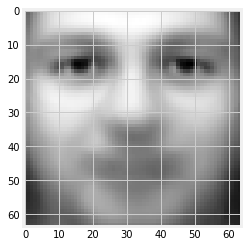

In [15]:
def mean_face(faces):
    return faces.mean(axis=1).reshape((64, 64))

plt.imshow(mean_face(faces), cmap='gray');

In [16]:
# We have some HUUUGE data matrix which we want to compute its mean
X = np.random.randn(20, 1000)
# Benchmarking time for computing mean
%time mean_naive(X)
%time mean(X)
pass

CPU times: user 1.4 ms, sys: 60 µs, total: 1.46 ms
Wall time: 1.42 ms
CPU times: user 51 µs, sys: 2 µs, total: 53 µs
Wall time: 56.3 µs


In [17]:
%time cov_naive(X)
%time cov(X)
pass

CPU times: user 5.7 ms, sys: 72 µs, total: 5.77 ms
Wall time: 5.63 ms
CPU times: user 696 µs, sys: 30 µs, total: 726 µs
Wall time: 399 µs


In [18]:
def time(f, repeat=100):
    times = []
    for _ in range(repeat):
        start = timeit.default_timer()
        f()
        stop = timeit.default_timer()
        times.append(stop-start)
    return np.mean(times), np.std(times)

In [19]:
fast_time = []
slow_time = []

for size in np.arange(100, 501, step=100):
    X = np.random.randn(size, 20)
    f = lambda : mean(X)
    mu, sigma = time(f)
    fast_time.append((size, mu, sigma))
    
    f = lambda : mean_naive(X)
    mu, sigma = time(f)
    slow_time.append((size, mu, sigma))

fast_time = np.array(fast_time)
slow_time = np.array(slow_time)

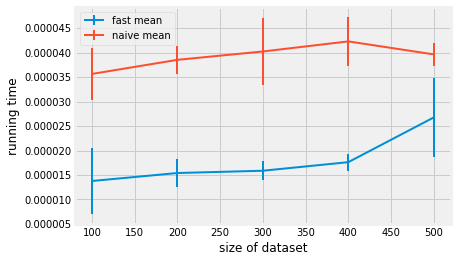

In [20]:
fig, ax = plt.subplots()
ax.errorbar(fast_time[:,0], fast_time[:,1], fast_time[:,2], label='fast mean', linewidth=2)
ax.errorbar(slow_time[:,0], slow_time[:,1], slow_time[:,2], label='naive mean', linewidth=2)
ax.set_xlabel('size of dataset')
ax.set_ylabel('running time')
plt.legend();

In [21]:
fast_time_cov = []
slow_time_cov = []
for size in np.arange(100, 501, step=100):
    X = np.random.randn(size, 20)
    
    f = lambda : cov(X) 
    mu, sigma = time(f)
    fast_time_cov.append((size, mu, sigma))
    
    f = lambda : cov_naive(X)         
    mu, sigma = time(f)  
    slow_time_cov.append((size, mu, sigma))

fast_time_cov = np.array(fast_time_cov)
slow_time_cov = np.array(slow_time_cov)

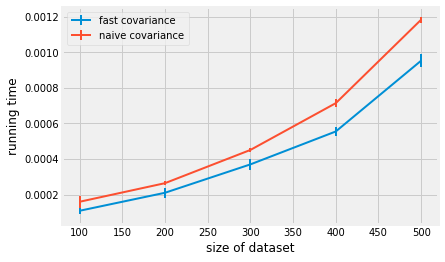

In [22]:
fig, ax = plt.subplots()
ax.errorbar(fast_time_cov[:,0], fast_time_cov[:,1], fast_time_cov[:,2], label='fast covariance', linewidth=2)
ax.errorbar(slow_time_cov[:,0], slow_time_cov[:,1], slow_time_cov[:,2], label='naive covariance', linewidth=2)
ax.set_xlabel('size of dataset')
ax.set_ylabel('running time')
plt.legend();

In [23]:
# GRADED FUNCTION: DO NOT EDIT
def affine_mean(mean, A, b):
    """Compute the mean after affine transformation
    Args:
        mean: ndarray, the mean vector(D,1)
        A, b: affine transformation applied to x
    Returns:
        mean vector after affine transformation
    """
    
    affine_mean = (A @ mean) + b
    return affine_mean

def affine_covariance(S, A, b):
    """Compute the covariance matrix after affine transformation
    Args:
        S: ndarray, the covariance matrix
        A, b: affine transformation applied to each element in X        
    Returns:
        covariance matrix after the transformation
    """
    affine_cov = A @ S @ np.transpose(A) 
    return affine_cov

In [24]:
random = np.random.RandomState(42)
A = random.randn(4,4)
b = random.randn(4,1)
A,b

(array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
        [-0.23415337, -0.23413696,  1.57921282,  0.76743473],
        [-0.46947439,  0.54256004, -0.46341769, -0.46572975],
        [ 0.24196227, -1.91328024, -1.72491783, -0.56228753]]),
 array([[-1.01283112],
        [ 0.31424733],
        [-0.90802408],
        [-1.4123037 ]]))

In [25]:
X = random.randn(4,100)

In [26]:
X1 = (A @ X) + b  # applying affine transformation once
X2 = (A @ X1) + b # twice

In [27]:
np.testing.assert_almost_equal(mean(X1).reshape(-1,1), affine_mean(mean(X).reshape(-1,1), A, b))
np.testing.assert_almost_equal(cov(X1),  affine_covariance(cov(X), A, b))

In [28]:
np.testing.assert_almost_equal(mean(X2).reshape(-1,1), affine_mean(mean(X1).reshape(-1,1), A, b))
np.testing.assert_almost_equal(cov(X2),  affine_covariance(cov(X1), A, b))